In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
pga = pd.read_csv('pga.csv')

In [3]:
pga.distance = (pga.distance - pga.distance.mean()) / pga.distance.std()
pga.accurancy = (pga.accuracy - pga.accuracy.mean()) / pga.accuracy.std()
print(pga.head())

   distance  accuracy
0  0.314379      59.5
1  1.693777      54.7
2 -0.059695      62.4
3 -0.574047      65.4
4  1.343083      52.8


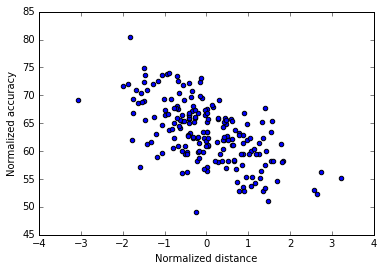

In [4]:
plt.scatter(pga.distance, pga.accuracy)
plt.xlabel('Normalized distance')
plt.ylabel('Normalized accuracy')
plt.show()

# 1: Linear Model

Instructions
Fit a linear model where distance is the independent variable and accuracy is the dependent variable.
Use the sklearn class LinearRegression and assign the coefficient of distance to theta1.
Hint
X must have two dimensions, use pga.distance[:, np.newaxis] to add an axis.

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np

print("Shape of the series:", pga.distance.shape)
print("Shape with newaxis:", pga.distance[:, np.newaxis].shape)

lm = LinearRegression()
lm.fit(pga.distance[:,np.newaxis], pga.accuracy)
theta1 = lm.coef_[0]

Shape of the series: (197,)
Shape with newaxis: (197, 1)


# 2: Cost Function, Introduction

Instructions
Compute the cost for each theta1 in theta1s and theta0=100.
Create a plot with theta1s on the x-axis and the corresponding costs on the y-axis.
Hint
Call the cost() function for each value in theta1s and add each result to a list (e.g. costs). Then use plt.plot() to plot the theta1s on the x-axis and the new list (costs) on the y-axis.

2026.19494962


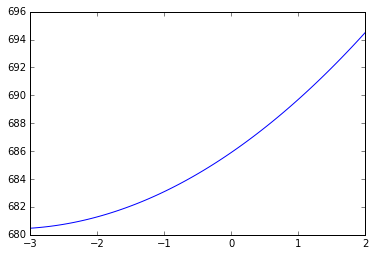

In [6]:
def cost(theta0, theta1, x, y):
    J = 0
    m = len(x)
    for i in range(m):
        h = theta1 * x[i] + theta0
        J += (h - y[i])**2
    J /= (2*m)
    return J

print(cost(0, 1, pga.distance, pga.accuracy))

theta0 = 100
theta1s = np.linspace(-3,2,100)

costs = []

for theta1 in theta1s:
    costs.append(cost(theta0, theta1, pga.distance, pga.accuracy))

plt.plot(theta1s, costs)

# 4: Cost Function, Continued

Instructions
Make a 3D surface plot with theta0s on the x-axis, theta1s on the y-axis, and the corrsponding cost on the z-axis.
Use the cost function to calculate the cost.
Assign each cost into the respective index in variable cost.
Hint
Use np.meshgrid to create a coordinate system. For each pair compute the cost.

[[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]
 [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]] 
 [[-10.         -10.         -10.         -10.         -10.        ]
 [ -9.7979798   -9.7979798   -9.7979798   -9.7979798   -9.7979798 ]
 [ -9.5959596   -9.5959596   -9.5959596   -9.5959596   -9.5959596 ]
 [ -9.39393939  -9.39393939  -9.39393939  -9.39393939  -9.39393939]
 [ -9.19191919  -9.19191919  -9.19191919  -9.19191919  -9.19191919]]


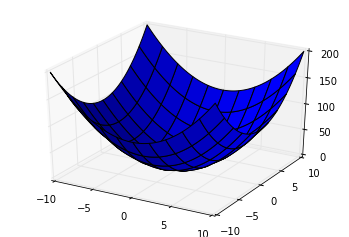

In [7]:
# example of a surface plot
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
X, Y = np.meshgrid(x, y)
print(X[:5,:5],"\n",Y[:5,:5])
Z = X**2 + Y**2
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X=X,Y=Y,Z=Z)

plt.show()

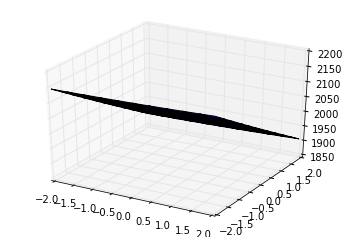

In [8]:
theta0s = np.linspace(-2,2,100)
theta1s = np.linspace(-2,2,100)
COST = np.empty(shape=(100,100))

TOS, T1S = np.meshgrid(theta0s, theta1s)

for i in range(100):
    for j in range(100):
        COST[i,j] = cost(TOS[0,i], T1S[j,0], pga.distance, pga.accuracy)
        
fig2 = plt.figure()
ax = fig2.gca(projection='3d')
ax.plot_surface(X=TOS,Y=T1S,Z=COST)

plt.show()

In [9]:
def partial_cost_theta1(theta0, theta1, x, y):
    h = theta0 + theta1*x
    diff = (h - y) * x
    partial = diff.sum() / (x.shape[0])
    return partial

partial1 = partial_cost_theta1(0, 5, pga.distance, pga.accuracy)
print("partial1 =", partial1)

def partial_cost_theta0(theta0, theta1, x, y):
    h = theta0 + theta1 * x
    diff = (h - y)
    partial = diff.sum() / (x.shape[0])
    return partial

partial0 = partial_cost_theta0(1, 1, pga.distance, pga.accuracy)
print("partial0 =", partial0)

partial1 = 8.275939464800619
partial0 = -62.36497461928934


# 7: Gradient Descent Algorithm

Instructions
Execute the gradient descent algorithm with alpha=0.01, x=pga.distance, and y=pga.accuracy.
Make a plot of costs on the y-axis and the iteration (0 to len(costs)) on the x-axis.
Hint
Add 'costs' into the dictionary being returned by gradient descent.

Theta1 = -3.3180061750337617


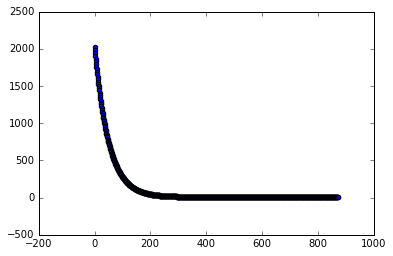

In [22]:
def gradient_descent(x , y, alpha = 0.1, theta0=0, theta1=0):
    max_epochs = 1000
    counter = 0
    c = cost(theta1, theta0, pga.distance, pga.accuracy)
    costs = [c]
    
    convergence_thres = 0.000001
    cprev = c + 10
    theta0s = [theta0]
    theta1s = [theta1]
    
    while (np.abs(cprev - c) > convergence_thres) and (counter < max_epochs):
        cprev = c
        
        update0 = alpha * partial_cost_theta0(theta0, theta1, x, y)
        update1 = alpha * partial_cost_theta1(theta0, theta1, x, y)
        
        theta0 -= update0
        theta1 -= update1
        
        theta0s.append(theta0)
        theta1s.append(theta1)
        
        c = cost(theta0, theta1, pga.distance, pga.accuracy)
        
        costs.append(c)
        counter += 1
        
    return {'Theta0': theta0, 'theta1': theta1, 'costs':costs}

print("Theta1 =", gradient_descent(pga.distance, pga.accuracy)['theta1'])

descend = gradient_descent(pga.distance, pga.accuracy, alpha=0.01)

plt.scatter(range(len(descend["costs"])), descend["costs"])
plt.show()